## Notebook to Analyze Utility System Impacts of Heat Pumps

In [31]:
import sys
import math
import numpy as np
import pandas as pd

# import matplotlib pyplot commands
from matplotlib.pyplot import *
 
# Show Plots in the Notebook
%matplotlib inline
 
# 'style' the plot like fivethirtyeight.com website
style.use('bmh')

#---- Auto-reload of modules
%load_ext autoreload
%autoreload 2

#---- Altair imports 
import altair as alt
alt.data_transformers.enable('json');   # keeps Huge data out of Notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Bring the heat pump calculator into the Python Path.
# This assumes that the heat-pump-calc project is present and on
# the same directory level as this heat-pump-study project.  Both
# are avaiable from GitHub: https://github.com/alanmitchell.
sys.path.insert(0, '../../heat-pump-calc')
import heatpump.library as lib
import heatpump.hp_model as hpmod

In [89]:
# Need to model a city that has some low temperatures, so that the curve of 
# electrical load will be fully mapped out across the temperature range.

In [16]:
lib.df_city.query('Name == "Talkeetna"')

,Name,Latitude,Longitude,ERHRegionID,WAPRegionID,ImpCost,FuelRefer,FuelCityID,Oil1Price,Oil2Price,...,TMYname,ElecUtilities,GasPrice,aris_city,census_city,census_area,ancsa_region,railbelt,hub,avg_elec_usage
ID,,,,,,,,,,,,,,,,,,,,,
279,Talkeetna,62.289921,-150.086334,2,2,1,False,NaN,3.09,NaN,...,"TALKEETNA STATE ARPT, AK","[(Matanuska Electric Assn. - Residential, 77),...",NaN,Talkeetna,Talkeetna CDP,Matanuska-Susitna Borough,Cook Inlet Regional (CIRI),Railbelt,False,"[674.3176110825001, 616.54369648225, 568.80201..."


In [95]:
lib.df_heatpumps.columns

Index(['brand', 'ahri_num', 'zones', 'outdoor_model', 'indoor_model', 'hspf',
       'in_pwr_5F_max', 'capacity_5F_max', 'in_pwr_47F_min', 'cop_5F_max',
       'cop_17F_max', 'cop_47F_max'],
      dtype='object')

In [96]:
lib.df_heatpumps.query('brand == "Fujitsu"')

,brand,ahri_num,zones,outdoor_model,indoor_model,hspf,in_pwr_5F_max,capacity_5F_max,in_pwr_47F_min,cop_5F_max,cop_17F_max,cop_47F_max
586,Fujitsu,5063325,Single,AOU9RLS2,ASU9RLS2,12.5,2.060000,15000.0,0.20,2.180000,2.450000,3.240000
587,Fujitsu,5063326,Single,AOU12RLS2,ASU12RLS2,12.0,2.100000,16500.0,0.20,2.340000,2.630000,3.240000
588,Fujitsu,5751311,Single,AOU9RLFC,AUU9RLF,13.0,1.870000,15000.0,0.15,2.410000,2.660000,2.930000
589,Fujitsu,5751312,Single,AOU9RLFC,ARU9RLF,12.2,1.870000,15000.0,0.15,2.410000,2.660000,2.930000
590,Fujitsu,5751313,Single,AOU12RLFC,AUU12RLF,12.2,2.250000,16500.0,0.15,2.180000,2.410000,2.850000
591,Fujitsu,5751314,Single,AOU12RLFC,ARU12RLF,11.5,2.250000,16500.0,0.15,2.180000,2.410000,2.850000
592,Fujitsu,6936995,Single,AOU9RLFF,AGU9RLF,12.6,2.100000,14000.0,0.20,1.950000,2.250000,2.990000
593,Fujitsu,6936996,Single,AOU12RLFF,AGU12RLF,11.6,2.170000,15000.0,0.20,2.020000,2.020000,3.100000
594,Fujitsu,6936997,Single,AOU15RLFF,AGU15RLF,11.2,2.910000,18500.0,0.18,1.860000,1.930000,3.030000
595,Fujitsu,6937309,Single,AOU9RLFFH,AGU9RLF,12.4,2.250000,14000.0,0.20,1.820000,2.080000,2.990000


In [82]:
# Base Case Inputs to the Heat Pump Calcuator.
in_base = dict(
    city_id=279,      # 279 = Talkeetna, 51 = Kotzebue
    utility=lib.util_from_id(77),
    pce_limit=500,
    co2_lbs_per_kwh=1.5,
    exist_heat_fuel_id=4,
    exist_unit_fuel_cost=3.09,
    exist_fuel_use=None,
    exist_heat_effic=0.8,
    exist_kwh_per_mmbtu=6.25,
    elec_use_jan=500,
    elec_use_may=350,
    includes_dhw=False,
    includes_dryer=False,
    includes_cooking=False,
    occupant_count=3,
    off_months_chks=[],
    garage_stall_count=1,
    garage_heated_by_hp=False,
    indoor_heat_setpoint=70,
    capital_cost=6000,
    rebate_dol=0,
    pct_financed=0,
    loan_term=10,
    loan_interest=0.05,
    hp_life=14,
    op_cost_chg=0,
    discount_rate=0.05,
    inflation_rate=0.02,
    fuel_esc_rate=0.03,
    elec_esc_rate=0.02,
    sales_tax=0.06,
    bldg_floor_area=2000,
    insul_level=2,
    pct_exposed_to_hp=0.46,
    doors_open_to_adjacent=True,
    bedroom_temp_tolerance='med',
    hp_model_id=-1,
    low_temp_cutoff=-5.0,
)

In [83]:
mod = hpmod.HP_model(**in_base)
mod.run()
mod.summary

{'fuel_unit': 'gallon',
 'fuel_desc': '#1 Oil',
 'design_heat_load': 37080.879192,
 'design_heat_temp': -16.060000000000002,
 'cop': 2.6944341700090026,
 'hp_max_capacity_5F': 13309.359,
 'max_hp_reached': True,
 'co2_lbs_saved': 2917.6161988161402,
 'co2_driving_miles_saved': 3271.3506118231944,
 'hp_load_frac': 0.7234382390196084,
 'irr': 0.08298674471327128,
 'npv': 1511.9606951924593,
 'fuel_use_base': 831.6594628151134,
 'fuel_use_hp': 233.5327651669221,
 'fuel_use_chg': -598.1266976481913,
 'fuel_price_incremental': 3.2754,
 'elec_use_base': 4666.3389940722445,
 'elec_use_hp': 11561.975901075451,
 'elec_use_chg': 6895.636907003207,
 'elec_rate_avg_base': 0.24013125328638224,
 'elec_rate_avg_hp': 0.21833306861144505,
 'elec_rate_incremental': 0.2035820426336499}

In [59]:
mod.df_hourly.columns

Index(['db_temp', 'day_of_year', 'month', 'running', 'cop', 'hp_load_mmbtu',
       'secondary_load_mmbtu', 'hp_kwh', 'secondary_fuel_mmbtu',
       'secondary_kwh', 'total_kwh'],
      dtype='object')

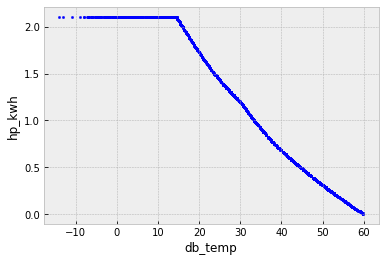

In [84]:
df_running = mod.df_hourly.query('hp_kwh != 0')
df_running.plot(x='db_temp', y='hp_kwh', kind='scatter', marker='.')
# These curves extend below the Low Temp Cutoff, because the algorithm
# requires that 5 hours of the day are below the low temp cutoff before
# the heat pump is not run.

In [85]:
def load_from_df(df_hourly, low_temp_cutoff):
    """Returns a Pandas series, indexed on temperature bins, that shows the
    heat pump load, averaged into and indexed on outdoor temperature bins.
    The 2 degree F temperature bins span from -10 F to 70 F.  If there is no 
    heat pump electrical use in a bin, it is filled with 0.  Load is expressed in
    kW.
    'df_hourly' is the hourly results DataFrame from the Heat Pump Model.
    'low_temp_cutoff' is the lowest outdoor temperature to include in the load
    profile.
    """
    df_fil = df_hourly.query('db_temp >= @low_temp_cutoff and hp_kwh > 0').copy()
    df_fil['temp_bin'] =  df_fil['db_temp'].map(lambda t: math.floor(t/2.0)*2.0 + 1.0)
    loads = df_fil.groupby('temp_bin').mean()['hp_kwh']

    # Make an index spanning the full range
    t_range = np.arange(-19.0, 70.0, 2.0)
    
    return loads.reindex(t_range, fill_value=0.0)
    

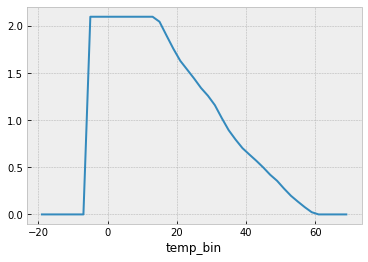

In [86]:
load_from_df(mod.df_hourly, -5.0).plot()

In [116]:
# Develop a series to multiply by that ramps load down from the 
# situation where all the heatpumps are on at +11 F and above to
# none on below -5 F,
# which approximates what happens if consumers shut off heat pumps somewhere between +11
# and -5 F
ser_shutoff = pd.Series(1.0, np.arange(-19, 70, 2.0))    # start with all 1s
ser_shutoff.loc[:-7.0] = 0.0      # All off at -7.0 F and below
# ramp the number of units on from -5 F up to +9 F
for ix in np.arange(-5.0, 11.0, 2.0):
    ser_shutoff.loc[ix] = (ix - -7.0)/2.0 * 1./9.
ser_shutoff.head(20)

-19.0    0.000000
-17.0    0.000000
-15.0    0.000000
-13.0    0.000000
-11.0    0.000000
-9.0     0.000000
-7.0     0.000000
-5.0     0.111111
-3.0     0.222222
-1.0     0.333333
 1.0     0.444444
 3.0     0.555556
 5.0     0.666667
 7.0     0.777778
 9.0     0.888889
 11.0    1.000000
 13.0    1.000000
 15.0    1.000000
 17.0    1.000000
 19.0    1.000000
dtype: float64

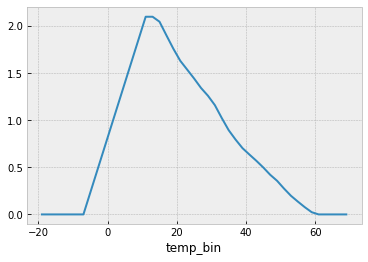

In [117]:
(load_from_df(mod.df_hourly, -5.0) * ser_shutoff).plot()

In [109]:
def run_and_combine_cases(case_list):
    """Runs the input cases in case_list, determines load profile, and then
    combines the cases together given the weightings in case_list.  case_list
    format is [
        (input_set1, weight1),
        (input_set2, weight2),
        etc.
    ]
    """
    loads_final = None
    for inputs, weight in case_list:
        mod = hpmod.HP_model(**inputs)
        mod.run()
        loads = load_from_df(mod.df_hourly, -5.0) * ser_shutoff
        if loads_final is not None:
            loads_final += loads * weight
        else:
            loads_final = loads * weight
            
    return loads_final

### Areas of State where Average Home size is 1,800 square feet

The Heat Pump IDs in the following input cases could be different in future versions of the Heat Pump Library, as the ID's are positional.  Update the IDs if running this with a version of the library later than that present on December 17, 2018.

In [97]:
# 2x6, 1800 ft2, single-head
in_case1 = in_base.copy()
in_case1.update(dict(
    bldg_floor_area=1800,
    insul_level=2,          # 2 x 6
    hp_model_id=602,        # Fujitsu 15RLS3
))

# 2x4, 1800 ft2, single-head
in_case2 = in_case1.copy()
in_case2.update(dict(
    insul_level=1,          # 2 x 6
))

# 2x6, 1800 ft2, 2-head (Mitsubishi Electric PUMY-P36NKMU1)
in_case3 = in_case1.copy()
in_case3.update(dict(
    hp_model_id=1142,        # Above Mitsubishi
    pct_exposed_to_hp=0.66,  # Fraction of floor area exposed to indoor units    
))

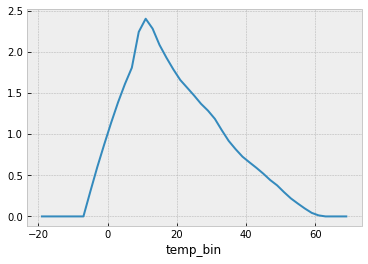

In [113]:
load_1800 = run_and_combine_cases([
    (in_case1, 0.85 * 0.65),
    (in_case2, 0.85 * 0.35),
    (in_case3, 0.15)
])
load_1800.plot()

### Areas of the State with an Average Home Size of 1,200 square feet

In [118]:
# 2x6, 1200 ft2, single-head
in_case1 = in_base.copy()
in_case1.update(dict(
    bldg_floor_area=1200,
    insul_level=2,          # 2 x 6
    hp_model_id=601,        # Fujitsu 12RLS3
))

# better than 2 x 6, 1200 ft2, single-head
in_case2 = in_case1.copy()
in_case2.update(dict(
    insul_level=3,          # better than 2 x 6
))


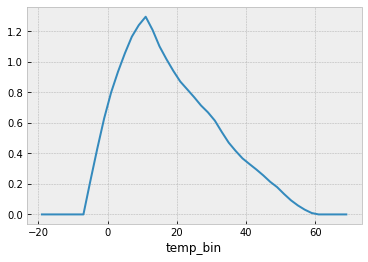

In [119]:
load_1200 = run_and_combine_cases([
    (in_case1, 0.65),
    (in_case2, 0.35),
])
load_1200.plot()

### Areas of the State with an Average Home Size of 950 square feet

In [122]:
# 2x6, 950 ft2, single-head
in_case1 = in_base.copy()
in_case1.update(dict(
    bldg_floor_area=950,
    insul_level=2,          # 2 x 6
    hp_model_id=601,        # Fujitsu 12RLS3
))

# better than 2 x 6, 950 ft2, single-head
in_case2 = in_case1.copy()
in_case2.update(dict(
    insul_level=3,          # better than 2 x 6
))


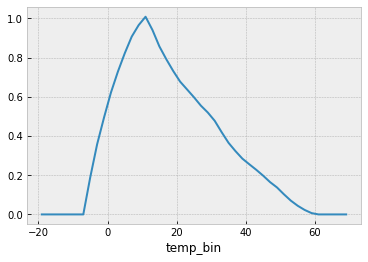

In [124]:
load_950 = run_and_combine_cases([
    (in_case1, 0.6),
    (in_case2, 0.4),
])
load_950.plot()

### Plot All Home Sizes Together

In [133]:
rcParams['figure.figsize']= (9, 6)   # set Chart Size
rcParams['font.size'] = 12.5            # set Font size in Chart

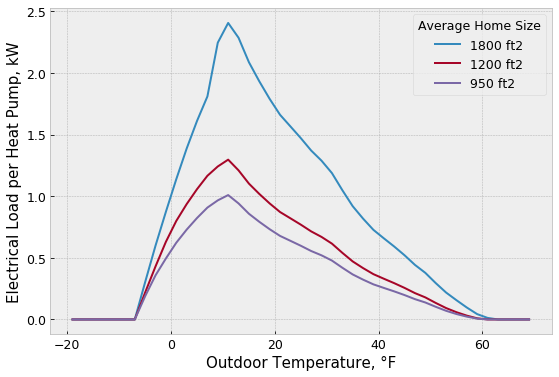

In [138]:
#df_plot = pd.DataFrame([load_1800, load_1200, load_950], columns=['1800 ft2', '1200 ft2', '950 ft2'])
df_plot = pd.concat([load_1800, load_1200, load_950], axis=1)
df_plot.columns = ['1800 ft2', '1200 ft2', '950 ft2']
df_plot.plot()
xlabel('Outdoor Temperature, °F')
ylabel('Electrical Load per Heat Pump, kW')
legend(title='Average Home Size')
savefig('images/hp_load.png')